***<h1>Regression</h1>***

In [301]:
# Importing Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 

# Model Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_predict, cross_val_score, validation_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# Preprocessing
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import learning_curve, ShuffleSplit

# Models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

from warnings import filterwarnings 
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, Lars, BayesianRidge, ARDRegression, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit, BayesianRidge, LarsCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
import locale
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import SCORERS


df = pd.read_csv('../CA1/housing_dataset.csv')

# things to do 

# - check maybe what advantages does each state have
# - since alot of the models are similar in perfomance, we can pick a few that fits best for the situation
# add the feature selection
# create the pipeline for the testing of each scaler on the x_train set
# perform normal model improvement for the models( hyperparameter tuning, oversampling)
# and also find out why i want to use MAE as a scoring over other.
# fix the previous hyperparamter tune and put it nicely

In [302]:
# We create some usefukl functions for later


# def evaluate_model_test(model, X_test, y_test):
#     y_pred = model.predict(X_test)
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     r2 = r2_score(y_test, y_pred)
    
#     print("Test Set Evaluation:")
#     print(f"MAE: {mae:.2f}")
#     print(f"MSE: {mse:.2f}")
#     print(f"RMSE: {rmse:.2f}")
#     print(f"R^2: {r2:.2f}")


# def evaluate_model_score(model, X_train, y_train):
#     y_pred = model.predict(X_train)
#     mae = mean_absolute_error(y_train, y_pred)
#     mse = mean_squared_error(y_train, y_pred)
#     rmse = mean_squared_error(y_train, y_pred, squared=False)
#     r2 = r2_score(y_train, y_pred)
    
#     print("Training Set Evaluation:")
#     print(f"MAE: {mae:.2f}")
#     print(f"MSE: {mse:.2f}")
#     print(f"RMSE: {rmse:.2f}")
#     print(f"R^2: {r2:.2f}")


def plot_learning_curve(estimator, X, y, cv, train_sizes, scoring):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation Score')
    
    plt.legend(loc='best')
    return plt


# def plot_learning_curve2(estimator, X, y, train_sizes, cv=5, scoring='neg_mean_squared_error'):
#     train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv, scoring=scoring)

#     train_scores_mean = -np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     val_scores_mean = -np.mean(val_scores, axis=1)
#     val_scores_std = np.std(val_scores, axis=1)

#     plt.figure(figsize=(8, 6))
#     plt.title('Learning Curve')
#     plt.xlabel('Training Examples')
#     plt.ylabel('Score')

#     plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
#     plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation Score')
#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1, color='r')
#     plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
#                      val_scores_mean + val_scores_std, alpha=0.1, color='g')

#     plt.legend(loc='best')
#     plt.grid(True)
#     plt.show()



# def get_scores(model, X_train, y_train, X_test, y_test):
#     # Calculate predictions
#     train_predictions = model.predict(X_train)
#     test_predictions = model.predict(X_test)
    
#     # Calculate scores
#     mae = mean_absolute_error(y_test, test_predictions)
#     mse = mean_squared_error(y_test, test_predictions)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, test_predictions)
    
#     # Create DataFrame
#     scores_df = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
#                               'Score': [mae, mse, rmse, r2]})
    
#     return scores_df

# from sklearn.model_selection import cross_val_predict

# def get_scores2(model, X, y, cv=5):
#     # Perform cross-validation and calculate predictions
#     predictions = cross_val_predict(model, X, y, cv=cv)
    
#     # Calculate scores
#     mae = mean_absolute_error(y, predictions)
#     mse = mean_squared_error(y, predictions)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y, predictions)
#     mape = mean_absolute_percentage_error(y, predictions)

#     # Create DataFrame
#     scores_df = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R2','MAPE'],
#                               'Score': ['{:g}'.format(score) for score in [mae, mse, rmse, r2, mape]]})
    
#     return scores_df

# def get_scores3(model, X_train, y_train, X_test, y_test):
#     # Calculate predictions
#     train_predictions = model.predict(X_train)
#     test_predictions = model.predict(X_test)
    
#     # Calculate scores
#     mae = mean_absolute_error(y_test, test_predictions)
#     mse = mean_squared_error(y_test, test_predictions)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, test_predictions)
#     mape = mean_absolute_percentage_error(y_test, test_predictions)

#     # Create DataFrame
#     scores_df = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'MAPE'],
#                               'Score': ['{:g}'.format(score) for score in [mae, mse, rmse, r2, mape]]})
    
#     return scores_df

def get_scores4(model, X_train, y_train, X_test, y_test):
    # Calculate predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    # Calculate scores
    mae_train = mean_absolute_error(y_train, train_predictions)
    mse_train = mean_squared_error(y_train, train_predictions)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, train_predictions)
    mape_train = mean_absolute_percentage_error(y_train, train_predictions)
    
    mae_test = mean_absolute_error(y_test, test_predictions)
    mse_test = mean_squared_error(y_test, test_predictions)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, test_predictions)
    mape_test = mean_absolute_percentage_error(y_test, test_predictions)

    # Create DataFrames for train and test scores
    train_scores_df = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'MAPE'],
                                    'Score': [locale.format_string("%f", score, grouping=True) for score in [mae_train, mse_train, rmse_train, r2_train, mape_train]]})
    
    test_scores_df = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'MAPE'],
                                   'Score': [locale.format_string("%f", score, grouping=True) for score in [mae_test, mse_test, rmse_test, r2_test, mape_test]]})

    return  test_scores_df, train_scores_df

def detect_outliers_zscore(df, threshold=3):
    # Detect outliers in each column of a DataFrame using Z-score method.
    
    outlier_indices = pd.DataFrame(index=df.index)
    
    for column in df.columns:
        # Calculate Z-scores for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        
        # Find the indices of the outliers
        column_outliers = z_scores > threshold
        outlier_indices[column] = column_outliers
        
    return outlier_indices

# def remove_outliers(X_train, y_train, column_names):
#     outliers = detect_outliers_zscore(X_train)
#     outlier_indices = outliers[column_names].any(axis=1).index
#     X_train_no_outliers = X_train.drop(outlier_indices)
#     y_train_no_outliers = y_train.drop(outlier_indices)
#     return X_train_no_outliers, y_train_no_outliers

def apply_standardscaler(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data


In [303]:
#  ['{:g}'.format(score) for score in [mae_train, mse_train, rmse_train, r2_train, mape_train]]})
# ['{:g}'.format(score) for score in [mae_test, mse_test, rmse_test, r2_test, mape_test]]})

***<h1>Data Analysis</h1>***

<!-- | Metric                         | Description                                                                             | Equation                                          |
|--------------------------------|-----------------------------------------------------------------------------------------|---------------------------------------------------|
| Mean Absolute Error (MAE)      | Average absolute difference between predicted and actual values                        | MAE = (1 / n) * ∑((y_true - y_pred))              |
| Mean Squared Error (MSE)       | Average squared difference between predicted and actual values                         | MSE = (1 / n) * ∑((y_true - y_pred)^2)            |
| Root Mean Squared Error (RMSE) | Square root of the average squared difference                                          | RMSE = √(MSE)                                     |
| R-squared                      | Proportion of the variance in the dependent variable explained by the independent variables | R^2 = 1 - (SSR / SST)                           | -->

| Metric             | Description                                                   | Equation                                                  |
|--------------------|---------------------------------------------------------------|-----------------------------------------------------------|
| Mean Absolute Error (MAE)  | Average absolute difference between predicted and actual values | MAE = (1 / n) * ∑((y_true - y_pred))                          |
| Mean Squared Error (MSE)   | Average squared difference between predicted and actual values  | MSE = (1 / n) * ∑((y_true - y_pred)^2)                        |
| Root Mean Squared Error (RMSE) | Square root of the average squared difference               | RMSE = √(MSE)                                             |
| R-squared          | Proportion of the variance in the dependent variable explained by the independent variables | R^2 = 1 - (SSR / SST)   |

#### Evaluation Metrics for Regression Models

- **RMSE (Root Mean Squared Error):**
  - Lower values indicate better performance.
  - Range: 0 to positive infinity.
  - A perfect score would be 0, indicating a perfect match between the predicted and actual values.

- **MAE (Mean Absolute Error):**
  - Lower values indicate better performance.
  - Range: 0 to positive infinity.
  - A perfect score would be 0, indicating a perfect match between the predicted and actual values.

- **MSE (Mean Squared Error):**
  - Lower values indicate better performance.
  - Range: 0 to positive infinity.
  - A perfect score would be 0, indicating a perfect match between the predicted and actual values.

- **R^2 (Coefficient of Determination):**
  - Range: -∞ to 1.
  - A score of 1 indicates a perfect fit.
  - A score of 0 indicates that the model performs no better than predicting the mean of the target variable.
  - Negative scores indicate that the model performs worse than predicting the mean.

In [304]:
df

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000
...,...,...,...,...,...,...,...,...
540,540,Seattle,300.0,2,1,1,unfurnished,182000
541,541,New York,240.0,3,1,1,semi-furnished,176715
542,542,Boston,362.0,2,1,1,unfurnished,175000
543,543,Seattle,291.0,3,1,1,furnished,175000


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


In [306]:
df = pd.read_csv('../CA1/housing_dataset.csv')
df = df.drop('House ID', axis=1)


<h3>Univariate Analysis</h3>

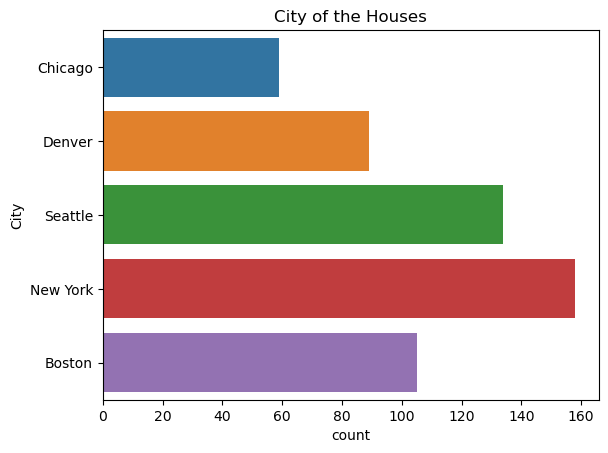

In [307]:
# change the color
sns.countplot(y = df['City'])
plt.title('City of the Houses')
plt.show()

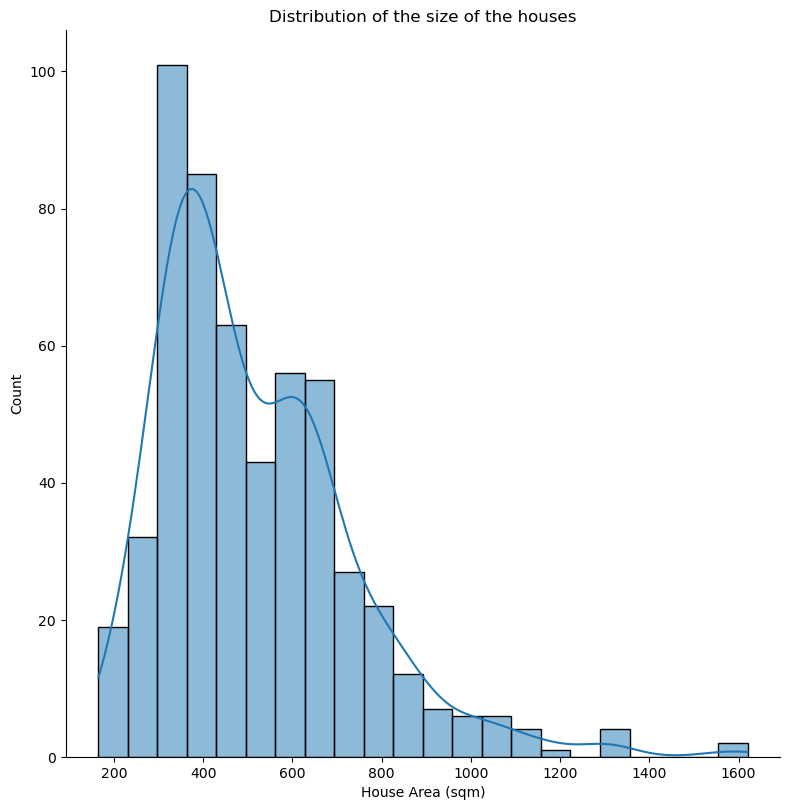

In [308]:
sns.displot(x='House Area (sqm)', kde=True, height=8, data=df)
plt.title('Distribution of the size of the houses')
plt.show()


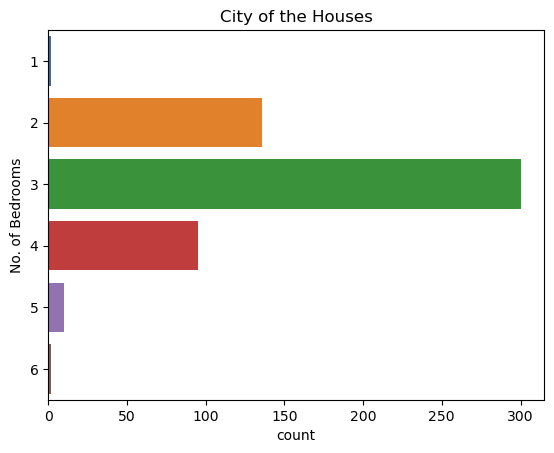

In [309]:
# change the color
sns.countplot(y = df['No. of Bedrooms'])
plt.title('City of the Houses')
plt.show()

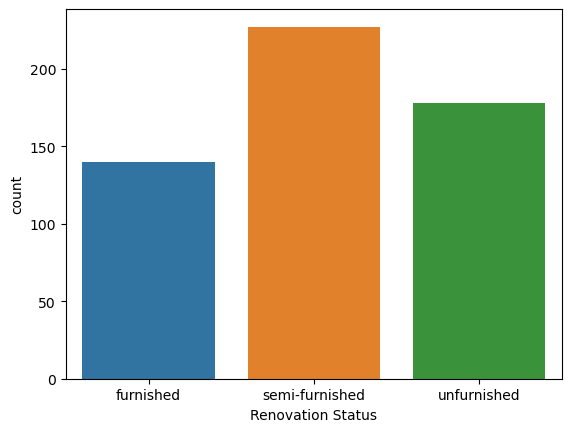

In [310]:
# change the color
sns.countplot(x = 'Renovation Status', data = df)
plt.show()

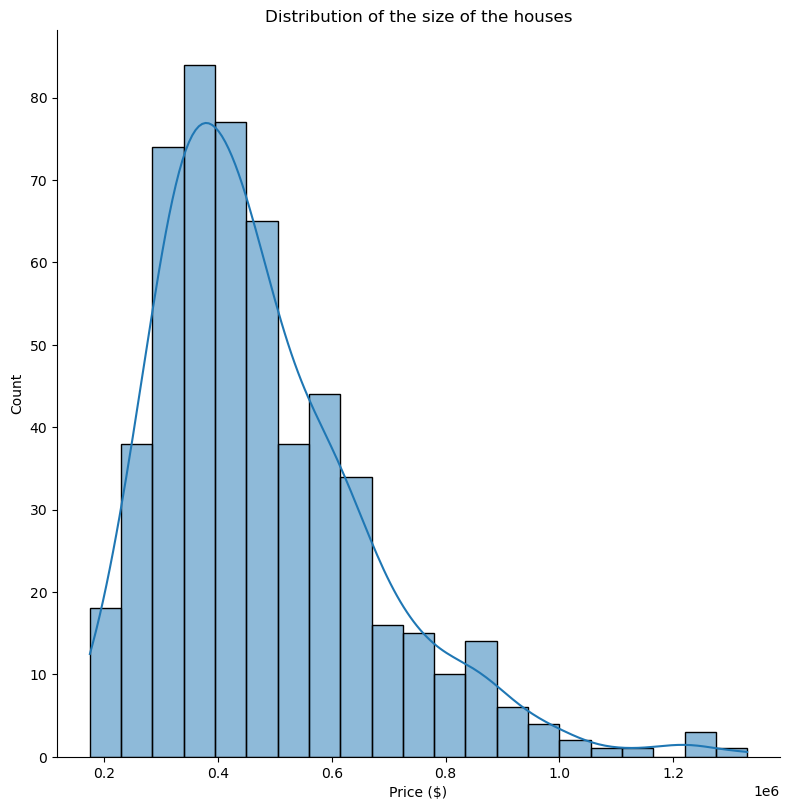

In [311]:
sns.displot(x='Price ($)', kde=True, height=8, data=df)
plt.title('Distribution of the size of the houses')
plt.show()

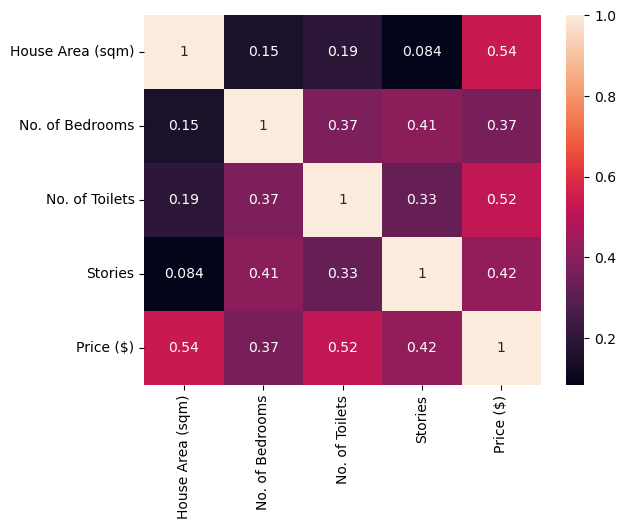

In [312]:
corr = df.corr()

sns.heatmap(corr, annot=True)   
plt.show()

<h3>Bivariate Analysis</h3>

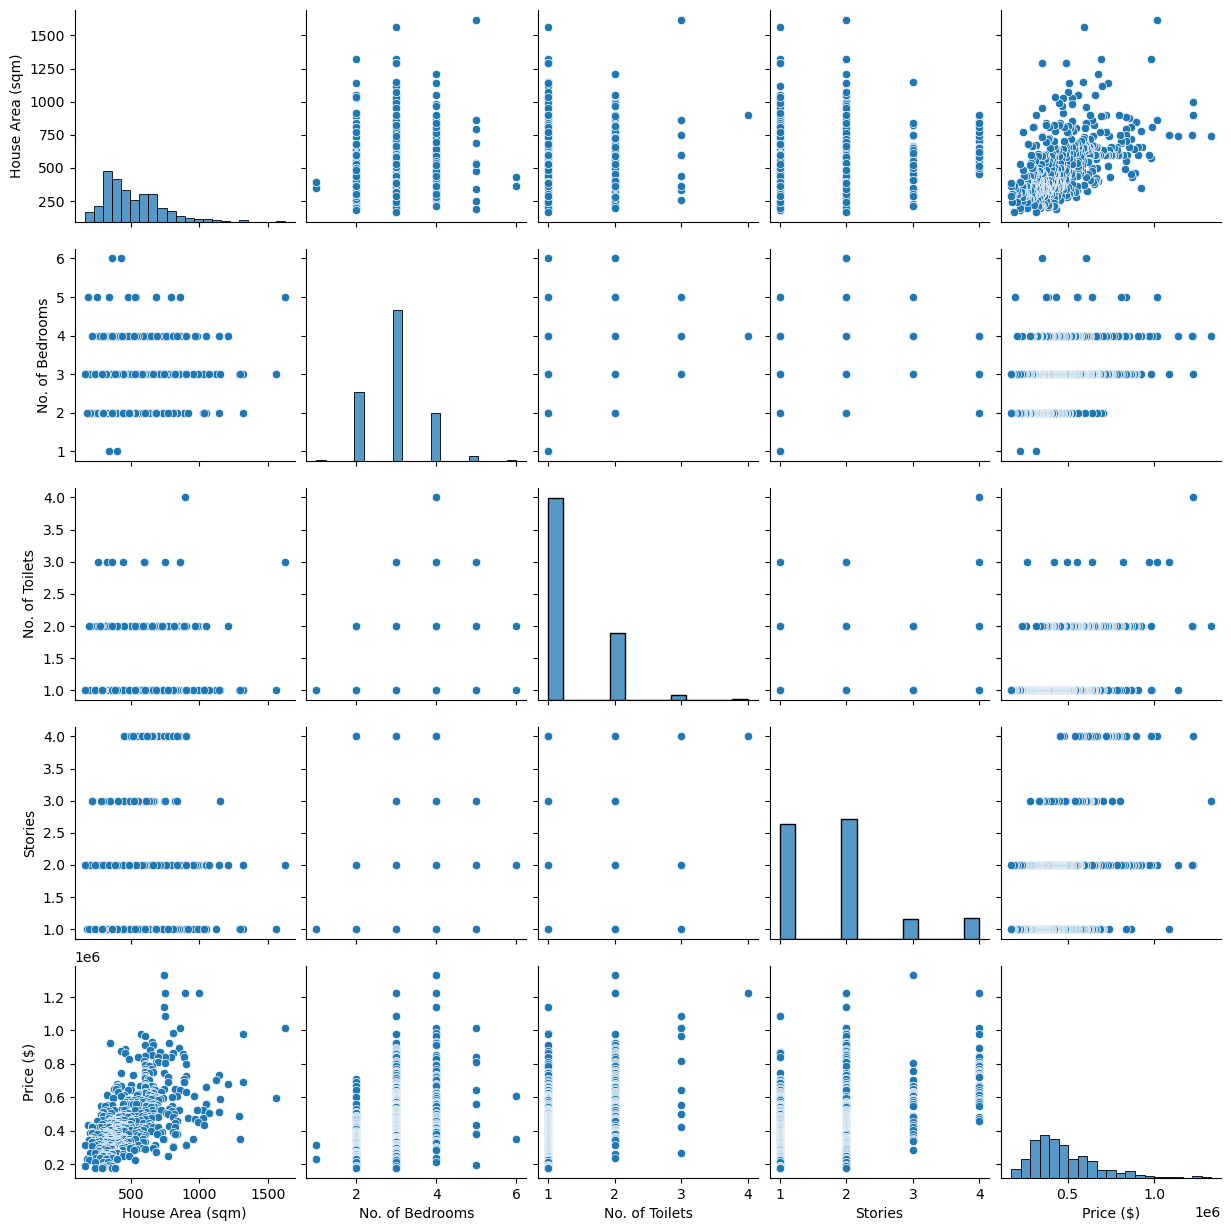

In [313]:
sns.pairplot(data = df)
plt.show()

<h1>Data preprocessing</h1>

<h3>Encoding</h3>

In [314]:
df = pd.read_csv('../CA1/housing_dataset.csv')

print("values and its Encoded counterpart")
print()
# Using Ordinal Encoder to encode the Renovation Status column since the renvation status is ordinal
renovation_status = df['Renovation Status'].values.reshape(-1, 1)

encoder = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])
encoded_renovation_status = encoder.fit_transform(renovation_status)
df['Renovation Status'] = encoded_renovation_status.flatten()
# df.drop('Renovation Status Encoded', axis=1, inplace=True)


# check if the value and encoded thing is the right order
original_values = encoder.inverse_transform(encoded_renovation_status)
unique_original_values = pd.unique(original_values.flatten())

# Create a dictionary to map the unique original values to their encoded values
mapping = {value: index for index, value in enumerate(unique_original_values[::-1])}

# Create a DataFrame to display the unique original values and their corresponding encoded values
for value in unique_original_values:
    encoded_value = format(mapping[value], ".1f")
    print(f"{value} - {encoded_value}")


print()

unique_values = df['City'].unique()
# print(unique_values)

# use label encoder to encode the cities in the dataframe since there are only 5 cities
encoder = LabelEncoder()
categorical_column = 'City'
unique_values = df[categorical_column].unique()

df[categorical_column] = encoder.fit_transform(df[categorical_column])
category = encoder.classes_
codes = encoder.transform(category)

for i, category in enumerate(category):
    print(f"{category} - {codes[i]}")


values and its Encoded counterpart

furnished - 2.0
semi-furnished - 1.0
unfurnished - 0.0

Boston - 0
Chicago - 1
Denver - 2
New York - 3
Seattle - 4


<h3>Feature Engineering</h3>
i decided to drop the House ID column as it is not relevant to the model

In [ ]:
df = df.drop('House ID', axis=1)


In [315]:
def convert_columns_to_int(df, columns):
    for column in columns:
        df[column] = df[column].astype(int)
    
# df['city'] = df['Column1'].astype(int)

columns_to_convert = ['City', 'Renovation Status']
convert_columns_to_int(df, columns_to_convert)

numeric_columns = df.select_dtypes(include='number').columns

# Count the number of numeric values in each column
numeric_value_counts = df[numeric_columns].count()


print(numeric_value_counts)
df.info()


City                 545
House Area (sqm)     545
No. of Bedrooms      545
No. of Toilets       545
Stories              545
Renovation Status    545
Price ($)            545
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               545 non-null    int32  
 1   House Area (sqm)   545 non-null    float64
 2   No. of Bedrooms    545 non-null    int64  
 3   No. of Toilets     545 non-null    int64  
 4   Stories            545 non-null    int64  
 5   Renovation Status  545 non-null    int32  
 6   Price ($)          545 non-null    int64  
dtypes: float64(1), int32(2), int64(4)
memory usage: 25.7 KB


*<h3>Standardization</h3>*

In [316]:
# columns_to_scale = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets','Stories']
# columns_to_log_transform = ['Price ($)']
# original_columns = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets','Stories',  'city', 'Renovation Status','Price ($)']




Testing for multicolonarity

In [318]:
X = df[['City', 'House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories','Renovation Status' ]]  # Add more columns as needed
y = df['Price ($)']

X = sm.add_constant(X)

model = sm.OLS(y, X)
result = model.fit()

# r_squared = result.rsquared

# Calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
# VIF = 1 / (1 - R^2)
vif["VIF"] = 1 / (1 - result.rsquared_adj)

print(vif)

            Variable       VIF
0              const  2.241153
1               City  2.241153
2   House Area (sqm)  2.241153
3    No. of Bedrooms  2.241153
4     No. of Toilets  2.241153
5            Stories  2.241153
6  Renovation Status  2.241153


In [319]:
import numpy as np
import pandas as pd
from numpy.linalg import eigvals


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Calculate the eigenvalues of the correlation matrix
eigenvalues = eigvals(correlation_matrix)

# Calculate the condition number
condition_number = np.max(eigenvalues) / np.min(eigenvalues)

# Print the eigenvalues and condition number
print("Eigenvalues:")
print(eigenvalues)
print("Condition Number:", condition_number)

Eigenvalues:
[2.5013615  0.29932008 1.10668614 0.98967353 0.85571312 0.59121287
 0.65603276]
Condition Number: 8.3568114171761


In [380]:
from sklearn.model_selection import train_test_split
# df = pd.read_csv('../CA1/housing_dataset.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Price ($)'], axis=1)  # Features
y = df[['Price ($)']]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = X_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Verify the shape of the training and testing sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (436, 6)
X_test shape: (109, 6)
y_train shape: (436, 1)
y_test shape: (109, 1)


Fit the standard scaler to the data using a pipeline

---

In [321]:
feature_columns = ['House Area (sqm)', 'No. of Bedrooms', 'No. of Toilets', 'Stories']
target_column = ['Price ($)']
additional_columns = ['city', 'Renovation Status']

feature_scaler = StandardScaler()

feature_ct = ColumnTransformer([
    ('feature_scaler', feature_scaler, feature_columns)
], remainder='passthrough')

# Create the pipeline for feature scaling
feature_pipeline = Pipeline([
    ('preprocessor', feature_ct)
])

# Apply the feature scaling pipeline to the train dataset
X_train_scaled = feature_pipeline.fit_transform(X_train)

# Apply the feature scaling pipeline to the test dataset
X_test_scaled = feature_pipeline.transform(X_test)

# Convert the scaled data back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns + additional_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_columns + additional_columns)

# Keep the target variables as they are (no scaling)
y_train_scaled_df = pd.DataFrame(y_train, columns=target_column)
y_test_scaled_df = pd.DataFrame(y_test, columns=target_column)

**<h2>Model Selection</h2>**

i decided to evaluate the models on 5 different scoring metric namely:
- *R2*
- *MAE (Mean Absolute Error)*
- *MSE (Mean Squared Error)*
- *RMSE (Root Mean Squared Error)*
- *MAPE (Mean Absolute Percentage Error)*

while focusing more on MAE since the MAE fits our background problem better

In [322]:

# Print the list of available scoring metrics
for metric in sorted(SCORERS.keys()):
    print(metric)

accuracy
adjusted_mutual_info_score
adjusted_rand_score
average_precision
balanced_accuracy
completeness_score
explained_variance
f1
f1_macro
f1_micro
f1_samples
f1_weighted
fowlkes_mallows_score
homogeneity_score
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted
matthews_corrcoef
max_error
mutual_info_score
neg_brier_score
neg_log_loss
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_gamma_deviance
neg_mean_poisson_deviance
neg_mean_squared_error
neg_mean_squared_log_error
neg_median_absolute_error
neg_negative_likelihood_ratio
neg_root_mean_squared_error
normalized_mutual_info_score
positive_likelihood_ratio
precision
precision_macro
precision_micro
precision_samples
precision_weighted
r2
rand_score
recall
recall_macro
recall_micro
recall_samples
recall_weighted
roc_auc
roc_auc_ovo
roc_auc_ovo_weighted
roc_auc_ovr
roc_auc_ovr_weighted
top_k_accuracy
v_measure_score


In [323]:
# Create a dummy regressor model
dummy_model = DummyRegressor(strategy='mean')  # You can choose different strategies like 'mean', 'median', 'constant', 'quantile', etc.

# Fit the dummy model on the training data
dummy_model.fit(X_train_scaled_df, y_train_scaled_df)

scores = get_scores2(dummy_model, X_train_scaled_df, y_train_scaled_df)
scores2 = get_scores2(dummy_model, X_test_scaled_df, y_test_scaled_df)

display(scores)
display(scores2)

,Metric,Score
0,MAE,135429
1,MSE,3.1049e+10
2,RMSE,176207
3,R2,-0.00697587
4,MAPE,0.317069


,Metric,Score
0,MAE,184705
1,MSE,5.39204e+10
2,RMSE,232208
3,R2,-0.0667649
4,MAPE,0.448222


In [324]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer, mean_squared_error
results_df = pd.DataFrame()

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'MLPRegressor': MLPRegressor(),
    'GaussianProcessRegressor': GaussianProcessRegressor(),
    'HuberRegressor': HuberRegressor(),
    'theil-sen regressor': TheilSenRegressor(),
    'passive-aggressive regressor': PassiveAggressiveRegressor(),
    'ransac regressor': RANSACRegressor(),
    'automatic relevance determination': ARDRegression(),
    'ortogonal matching pursuit': OrthogonalMatchingPursuit(),
    'bayesian ridge': BayesianRidge(),
    'kernel ridge': KernelRidge(),
    'larscv': LarsCV(),
}


scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'R^2': 'r2',
    'MAPE': 'neg_mean_absolute_percentage_error'

}

for name in models:
    model = models[name]
    cv_results = cross_validate(model, X_train_scaled_df, y_train_scaled_df, scoring=scoring, cv=5, return_train_score=True)
    
    for metric in scoring:
        for score_train, score_test in zip(cv_results['train_{}'.format(metric)], cv_results['test_{}'.format(metric)]):
            results_df = results_df.append({'model': name, 'Dataset': 'Train', 'metric': metric, 'score': score_train}, ignore_index=True)
            results_df = results_df.append({'model': name, 'Dataset': 'Test', 'metric': metric, 'score': score_test}, ignore_index=True)


# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

results_df


,model,Dataset,metric,score
0,Linear Regression,Train,RMSE,-114591.740412
1,Linear Regression,Test,RMSE,-121879.405323
2,Linear Regression,Train,RMSE,-115769.390799
3,Linear Regression,Test,RMSE,-116380.837697
4,Linear Regression,Train,RMSE,-120936.120760
...,...,...,...,...
895,larscv,Test,MAPE,-0.180085
896,larscv,Train,MAPE,-0.185697
897,larscv,Test,MAPE,-0.194624
898,larscv,Train,MAPE,-0.183957


In [325]:
results_pivot = results_df.pivot_table(index='model', columns=['metric', 'Dataset'], values='score')

results_pivot

metric                                      MAE                      MAPE  \
Dataset                                    Test          Train       Test   
model                                                                       
Elastic Net                       -8.930099e+04  -87963.106578  -0.203304   
GaussianProcessRegressor          -1.453850e+07   -4208.300376 -33.312420   
Gradient Boosting                 -8.814522e+04  -54882.248109  -0.195546   
HuberRegressor                    -8.586209e+04  -83892.006893  -0.187593   
Lasso                             -8.662648e+04  -84248.487895  -0.191990   
Linear Regression                 -8.662663e+04  -84248.557067  -0.191990   
MLPRegressor                      -4.705152e+05 -470534.957530  -0.999753   
Random Forest                     -8.948331e+04  -33211.647312  -0.197894   
Ridge                             -8.660828e+04  -84245.679405  -0.191999   
Support Vector Regression         -1.312606e+05 -130917.252785  -0.281328   
automatic relevance determination -9.146418e+04  -88680.786202  -0.207429   
bayesian ridge                    -8.652248e+04  -84234.856492  -0.192086   
kernel ridge                      -1.803877e+05 -177838.769613  -0.412215   
larscv                            -8.631180e+04  -84222.664392  -0.192634   
ortogonal matching pursuit        -1.145237e+05 -110098.167178  -0.259887   
passive-aggressive regressor      -1.398043e+05 -137092.368904  -0.301907   
ransac regressor                  -9.903022e+04  -92282.447092  -0.214359   
theil-sen regressor               -9.061265e+04  -88964.221434  -0.191023   

metric                                                MSE                \
Dataset                               Train          Test         Train   
model                                                                     
Elastic Net                       -0.200954 -1.506168e+10 -1.447344e+10   
GaussianProcessRegressor          -0.012256 -3.112037e+15 -2.042535e+08   
Gradient Boosting                 -0.125876 -1.508029e+10 -5.389189e+09   
HuberRegressor                    -0.183882 -1.416397e+10 -1.350888e+10   
Lasso                             -0.188006 -1.415683e+10 -1.331514e+10   
Linear Regression                 -0.188006 -1.415685e+10 -1.331514e+10   
MLPRegressor                      -0.999752 -2.521919e+11 -2.522224e+11   
Random Forest                     -0.074228 -1.556125e+10 -2.104181e+09   
Ridge                             -0.188039 -1.415414e+10 -1.331522e+10   
Support Vector Regression         -0.280579 -3.261593e+10 -3.244110e+10   
automatic relevance determination -0.201271 -1.540619e+10 -1.459059e+10   
bayesian ridge                    -0.188246 -1.414198e+10 -1.331878e+10   
kernel ridge                      -0.407642 -5.130760e+10 -4.984755e+10   
larscv                            -0.188871 -1.408692e+10 -1.337944e+10   
ortogonal matching pursuit        -0.253022 -2.439881e+10 -2.152555e+10   
passive-aggressive regressor      -0.296662 -3.292301e+10 -3.197519e+10   
ransac regressor                  -0.198717 -1.819491e+10 -1.645224e+10   
theil-sen regressor               -0.187786 -1.624238e+10 -1.558065e+10   

metric                                     RMSE                          R^2  \
Dataset                                    Test          Train          Test   
model                                                                          
Elastic Net                       -1.215037e+05 -120262.889075      0.504152   
GaussianProcessRegressor          -4.730357e+07  -14184.115403 -92998.765410   
Gradient Boosting                 -1.218011e+05  -73382.571262      0.489976   
HuberRegressor                    -1.180672e+05 -116188.625131      0.529096   
Lasso                             -1.183008e+05 -115349.285458      0.523165   
Linear Regression                 -1.183009e+05 -115349.285442      0.523163   
MLPRegressor                      -5.015350e+05 -502180.026630     -7.815440   
Random

somehow my R^2 was negative but i found out

- R2
 compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). If the chosen model fits worse than a horizontal line, then R2
 is negative. Note that R2
 is not always the square of anything, so it can have a negative value without violating any rules of math. R2
 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

Example: fit data to a linear regression model constrained so that the Y
 intercept must equal 1500

which explains why some model has negative R^2 values

In [327]:
metrics = ['RMSE', 'MAE', 'MSE', 'MAPE', 'R^2']

# Create an empty DataFrame to store the results
top_models_df = pd.DataFrame(columns=['metric', 'Dataset', 'model', 'score'])

# Find the top models with the lowest values for RMSE, MAE, MSE, and MAPE on Test and Train datasets
for metric in metrics[:4]:
    for dataset in ['Test', 'Train']:
        lowest_models = results_pivot[metric][dataset].nlargest(5)
        for model, score in lowest_models.items():
            top_models_df = top_models_df.append({
                'metric': metric,
                'Dataset': dataset,
                'model': model,
                'score': '{:g}'.format(float(score))
            }, ignore_index=True)

# Find the top models with the highest values for R^2 on Test and Train datasets
for dataset in ['Test', 'Train']:
    highest_models = results_pivot['R^2'][dataset].nlargest(3)
    for model, score in highest_models.items():
        top_models_df = top_models_df.append({
            'metric': 'R^2',
            'Dataset': dataset,
            'model': model,
            'score': '{:g}'.format(float(score))
        }, ignore_index=True)

top_models_df

,metric,Dataset,model,score
0,RMSE,Test,larscv,-117889
1,RMSE,Test,HuberRegressor,-118067
2,RMSE,Test,bayesian ridge,-118208
3,RMSE,Test,Ridge,-118285
4,RMSE,Test,Lasso,-118301
5,RMSE,Train,GaussianProcessRegressor,-14184.1
6,RMSE,Train,Random Forest,-45830.3
7,RMSE,Train,Gradient Boosting,-73382.6
8,RMSE,Train,Linear Regression,-115349
9,RMSE,Train,Lasso,-115349


Through evaluating many models i found the top 5 highest scorer for MAE: 
- `Huber Regressor`  
- `Larscv`
- `Bayesian Ridge`
- `Ridge`
- `Lasso`

since their scores are similar and there is no clear model that is better than the other i decided to plot their learning curve to choose the best out of the 5 to proceed further with model selection and model improvement

***<h2>`Baseline Model`</h2>***

First we show the baseline model to compare the rest to


---

<module 'matplotlib.pyplot' from 'c:\\Users\\khood\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

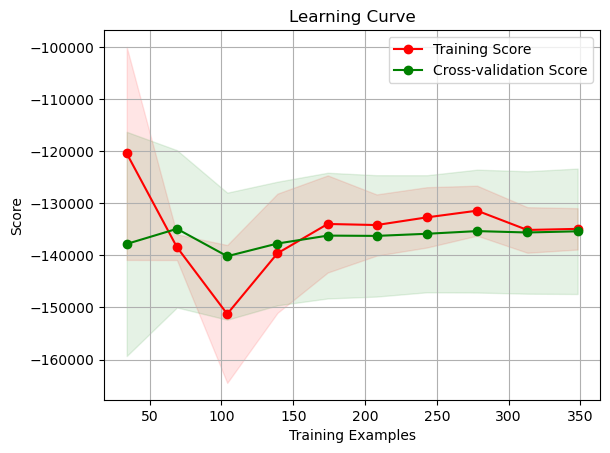

In [328]:
plot_learning_curve(dummy_model, X_train_scaled_df, y_train_scaled_df,cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring = 'neg_mean_absolute_error')


***<h2>`Huber Regressor Model`</h2>***

----

,Metric,Score
0,MAE,115854.546684
1,MSE,24513039212.246254
2,RMSE,156566.405120
3,R2,0.515032
4,MAPE,0.250673


,Metric,Score
0,MAE,84074.960517
1,MSE,13575275283.805506
2,RMSE,116512.983327
3,R2,0.559729
4,MAPE,0.184155


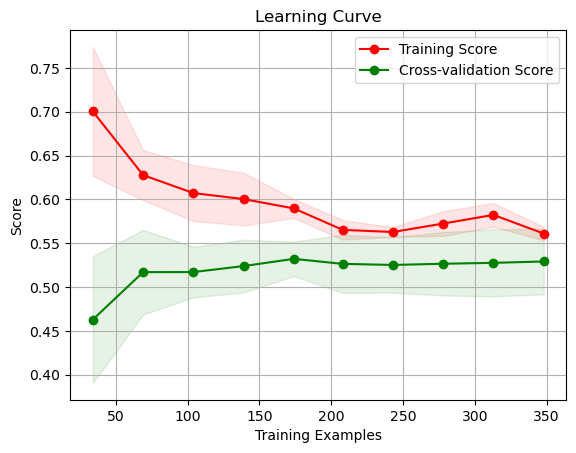

In [329]:
model1 = HuberRegressor()

model1.fit(X_train_scaled_df, y_train_scaled_df)

# scores = get_scores3(model1, X_train_scaled_df, y_train_scaled_df)
# scores2 = get_scores3(model1, X_test_scaled_df, y_test_scaled_df)

# score = get_scores3(model1, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)
scores,scores2 = get_scores4(model1, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)

plot_learning_curve(model1, X_train_scaled_df, y_train_scaled_df,cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring = 'r2')

display(scores)
display(scores2)

***<h2>`Ridge Model`</h2>***

---

,Metric,Score
0,MAE,116821.519010
1,MSE,23987123969.839680
2,RMSE,154877.771064
3,R2,0.525437
4,MAPE,0.257812


,Metric,Score
0,MAE,84436.230770
1,MSE,13399588844.564444
2,RMSE,115756.593093
3,R2,0.565427
4,MAPE,0.188243


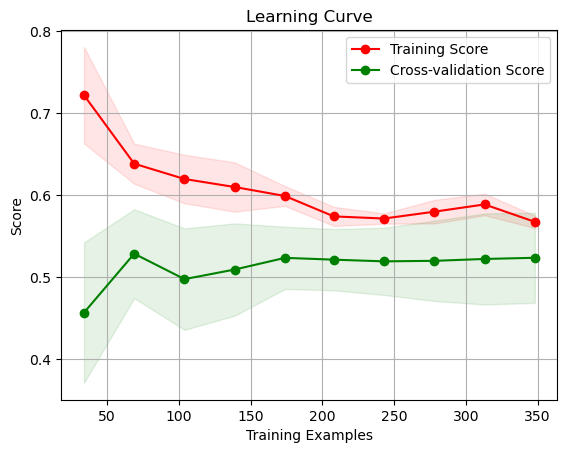

In [330]:
model2 = Ridge()

model2.fit(X_train_scaled_df, y_train_scaled_df)

# scores = get_scores3(model2, X_train_scaled_df, y_train_scaled_df)
# scores2 = get_scores3(model2, X_test_scaled_df, y_test_scaled_df)
scores, scores2 = get_scores4(model2, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)


plot_learning_curve(model2, X_train_scaled_df, y_train_scaled_df,cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring = 'r2')
display(scores)
display(scores2)



***<h2>`Lasso Model`</h2>***


---

,Metric,Score
0,MAE,116828.624396
1,MSE,23976698168.120228
2,RMSE,154844.109246
3,R2,0.525643
4,MAPE,0.257781


,Metric,Score
0,MAE,84439.356789
1,MSE,13399538102.066689
2,RMSE,115756.373916
3,R2,0.565429
4,MAPE,0.188216


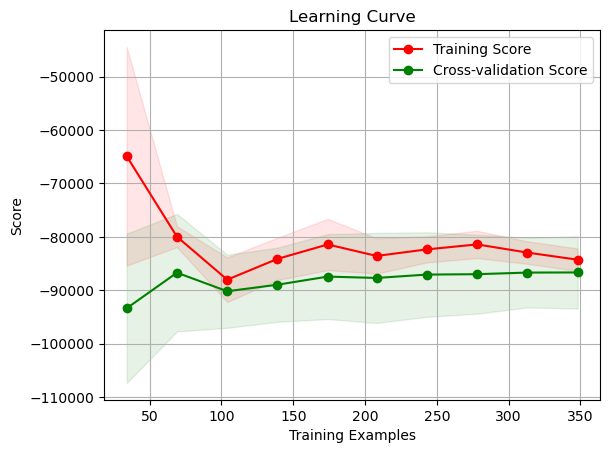

In [331]:
model3 = Lasso()

model3.fit(X_train_scaled_df, y_train_scaled_df)

# scores = get_scores3(model3, X_train_scaled_df, y_train_scaled_df)
# scores2 = get_scores3(model3, X_test_scaled_df, y_test_scaled_df)
scores, scores2 = get_scores4(model3, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)


plot_learning_curve(model3, X_train_scaled_df, y_train_scaled_df,cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring = 'neg_mean_absolute_error')
display(scores)
display(scores2)

***<h2>`Bayesian Ridge Model`</h2>***


---

,Metric,Score
0,MAE,116780.840871
1,MSE,24050494061.628517
2,RMSE,155082.217103
3,R2,0.524183
4,MAPE,0.257993


,Metric,Score
0,MAE,84423.676922
1,MSE,13401881165.883982
2,RMSE,115766.494142
3,R2,0.565353
4,MAPE,0.188412


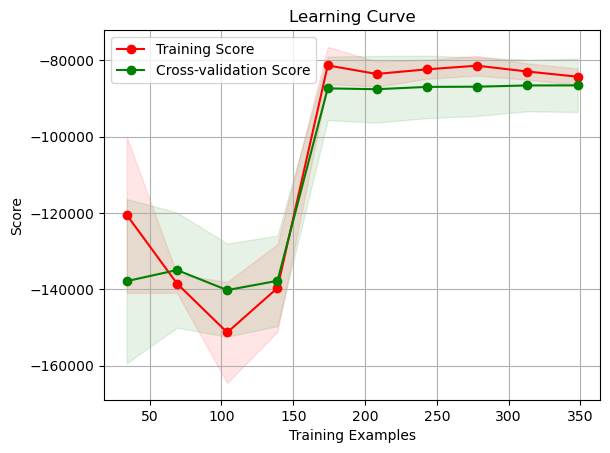

In [332]:
model4 = BayesianRidge()

model4.fit(X_train_scaled_df, y_train_scaled_df)

# scores = get_scores3(model4, X_train_scaled_df, y_train_scaled_df)
# scores2 = get_scores3(model4, X_test_scaled_df, y_test_scaled_df)
scores, scores2 = get_scores4(model4, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)


plot_learning_curve(model4, X_train_scaled_df, y_train_scaled_df,cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring = 'neg_mean_absolute_error')
display(scores)
display(scores2)

***<h2>`LarsCV Model`</h2>***


---

,Metric,Score
0,MAE,116653.191320
1,MSE,24089509839.517914
2,RMSE,155207.956753
3,R2,0.523411
4,MAPE,0.258134


,Metric,Score
0,MAE,84291.634634
1,MSE,13414034854.834846
2,RMSE,115818.974503
3,R2,0.564959
4,MAPE,0.188458


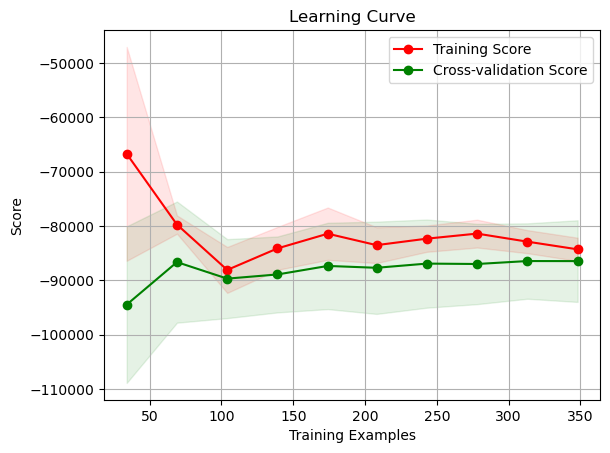

In [333]:
model5 = LarsCV()

model5.fit(X_train_scaled_df, y_train_scaled_df)

# scores = get_scores3(model5, X_train_scaled_df, y_train_scaled_df)
# scores2 = get_scores3(model5, X_test_scaled_df, y_test_scaled_df)
scores, scores2 = get_scores4(model5, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)


plot_learning_curve(model5, X_train_scaled, y_train_scaled_df,cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring = 'neg_mean_absolute_error')
display(scores)
display(scores2)

<!-- 1. **Mean Squared Error (MSE):**
   - Definition: The average of the squared differences between the predicted and actual values.
   - Interpretation: It measures the average squared error of the model's predictions. Lower MSE values indicate better model performance, with 0 being the best possible score. However, MSE is sensitive to outliers due to the squared term.
   - Code: `mean_squared_error(y_true, y_pred)`

2. **Root Mean Squared Error (RMSE):**
   - Definition: The square root of the MSE.
   - Interpretation: RMSE provides an interpretable metric in the same unit as the target variable. Lower RMSE values indicate better model performance. Like MSE, it is also sensitive to outliers.
   - Code: `np.sqrt(mean_squared_error(y_true, y_pred))`

3. **Mean Absolute Error (MAE):**
   - Definition: The average of the absolute differences between the predicted and actual values.
   - Interpretation: MAE measures the average absolute error of the model's predictions. It provides a more interpretable metric than MSE and RMSE, as it is not affected by the squared term. Lower MAE values indicate better model performance.
   - Code: `mean_absolute_error(y_true, y_pred)`

4. **R^2 Score (Coefficient of Determination):**
   - Definition: The proportion of variance in the target variable explained by the model.
   - Interpretation: R^2 score represents the goodness of fit of the model to the data. It indicates the percentage of the variance in the target variable that can be explained by the model. R^2 score ranges from 0 to 1, with 1 indicating a perfect fit. However, R^2 score can be negative if the model performs worse than a horizontal line (the baseline).
   - Code: `r2_score(y_true, y_pred)` -->

<!-- ### Scoring Metrics for Regression Models

**Mean Squared Error (MSE):**

- Definition: The average of the squared differences between the predicted and actual values.
- Interpretation: A lower MSE indicates better performance, with smaller average squared differences between predicted and actual values being desirable. The specific interpretation of a good score depends on the scale and context of the target variable.

**Root Mean Squared Error (RMSE):**

- Definition: The square root of the MSE.
- Interpretation: Similar to MSE, a lower RMSE indicates better performance. It provides an interpretable metric in the same unit as the target variable.

**Mean Absolute Error (MAE):**

- Definition: The average of the absolute differences between the predicted and actual values.
- Interpretation: Like MSE and RMSE, a lower MAE indicates better performance, with smaller average absolute differences between predicted and actual values being desirable.

**R^2 Score (Coefficient of Determination):**

- Definition: The proportion of variance in the target variable explained by the model.
- Interpretation: R^2 score ranges from 0 to 1, with 1 being the best possible score. A higher R^2 score indicates a better fit of the model to the data, with a higher percentage of the variance in the target variable explained. However, the interpretation of what constitutes a good R^2 score can vary depending on the field, problem complexity, and specific context.

 -->







*<h2>Further Model Selection</h2>*

There are 2 Models with extremely similar learning curve we will hyperparameter tune both and evaluate after that, the 2 models being:  
- `Ridge`
- `Huber Regressor`

- `Stacking of Huber Regressor and Ridge`

> i added a stacking of both to see if both added together will be better than the individual models

In [334]:
model = Ridge()

# Get all the parameters and their current values
params = model.get_params()

# List all the parameters
for param in sorted(params.keys()):
    print(param)

alpha
copy_X
fit_intercept
max_iter
positive
random_state
solver
tol


In [335]:
# Create the model
model1 = Ridge()

param_grid = {
    'alpha': [1.0, 10.0, 15.0 ,20.0, 30.0, 40.0, 50.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'copy_X': [True, False],
    'max_iter': [0.5,1, 10, 25, 50, 100, 500, 1000],
    'fit_intercept': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

# Fit the model to the training data
grid_search.fit(X_train_scaled_df, y_train_scaled_df)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_



print("Best Parameters:", best_params)
print("Best Score (MAE):", best_score)

Best Parameters: {'alpha': 50.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1, 'solver': 'saga'}
Best Score (MAE): 86116.05620539088


In [336]:
model1 = Ridge()
best_model1 = Ridge(**best_params)

# Fit the best model to the training data
model1.fit(X_train_scaled_df, y_train_scaled_df)
best_model1.fit(X_train_scaled_df, y_train_scaled_df)

score, score2 = get_scores4(model1, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)
scores, score2 = get_scores4(best_model1, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)

display(score)
display(scores)


,Metric,Score
0,MAE,116821.519010
1,MSE,23987123969.839680
2,RMSE,154877.771064
3,R2,0.525437
4,MAPE,0.257812


,Metric,Score
0,MAE,116367.012549
1,MSE,24795453062.402035
2,RMSE,157465.720277
3,R2,0.509445
4,MAPE,0.260825


2. Huber Regressor Hyperparameter tuning

In [337]:
model = HuberRegressor()

# Get all the parameters and their current values
params = model.get_params()

# List all the parameters
for param in sorted(params.keys()):
    print(param)

alpha
epsilon
fit_intercept
max_iter
tol
warm_start


In [338]:
# Create the HuberRegressor model
model2 = HuberRegressor()

param_grid = {
    'epsilon': [1.0, 1.5, 1.75, 1.8, 2.0],
    'alpha': [0.00001, 0.0001, 0.001, 0.01],
    'max_iter': [1, 10, 25, 50, 100, 500, 1000],
    'warm_start': [True, False],
    'fit_intercept': [True, False]

}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

# Fit the model to the training data
grid_search.fit(X_train_scaled_df, y_train_scaled_df)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MAE):", best_score)

Best Parameters: {'alpha': 0.0001, 'epsilon': 1.75, 'fit_intercept': True, 'max_iter': 10, 'warm_start': True}
Best Score (MAE): 85744.60656694084


In [339]:
model2 = HuberRegressor()
best_model2 = HuberRegressor(**best_params)

# Fit the best model to the training data
model2.fit(X_train_scaled_df, y_train_scaled_df)
best_model2.fit(X_train_scaled_df, y_train_scaled_df)

score,score2 = get_scores4(model2, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)
scores,scores2 = get_scores4(best_model2, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)


display(score)
display(scores)

,Metric,Score
0,MAE,115854.546684
1,MSE,24513039212.246254
2,RMSE,156566.405120
3,R2,0.515032
4,MAPE,0.250673


,Metric,Score
0,MAE,116236.460962
1,MSE,24609818136.853283
2,RMSE,156875.167368
3,R2,0.513117
4,MAPE,0.252594


In [340]:
model_list = [
    ('huber', HuberRegressor()),
    ('ridge', Ridge())
]

stack_model = StackingRegressor(estimators=model_list, final_estimator=Ridge())

stack_model.fit(X_train_scaled_df, y_train_scaled_df)

scores,scores2 = get_scores4(stack_model, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)

display(scores)
display(scores2)

,Metric,Score
0,MAE,115605.044585
1,MSE,23714004869.450066
2,RMSE,153993.522167
3,R2,0.530840
4,MAPE,0.255157


,Metric,Score
0,MAE,84313.774490
1,MSE,13468425019.581017
2,RMSE,116053.543761
3,R2,0.563195
4,MAPE,0.188165


In [341]:

param_grid = {
    'final_estimator__alpha': [10000.0, 20000.0, 50000.0, 100000.0, 500000.0, 1000000.0],
    'ridge__alpha': [0.1, 1.0, 10.0, 20.0, 30.0],
    'huber__epsilon': [1.0, 1.5, 2.0, 2.5 ],
    'huber__max_iter': [ 10, 25, 50, 100, 200, 300]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(stack_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled_df, y_train_scaled_df)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Fit the best model on the training data
best_model.fit(X_train_scaled_df, y_train_scaled_df)

# Evaluate on the test data
mae = mean_absolute_error(y_test_scaled_df, best_model.predict(X_test_scaled_df))
print("Best MAE:", mae)
print("Best Hyperparameters:", best_params)
print("Best Cross-validated MAE:", best_score)

Best MAE: 116270.81505134117
Best Hyperparameters: {'final_estimator__alpha': 1000000.0, 'huber__epsilon': 2.0, 'huber__max_iter': 25, 'ridge__alpha': 20.0}
Best Cross-validated MAE: -85940.22977916308


constant efforts to test which is the best final estimator alpha doesn't significantly improve the results

In [342]:
best_model.fit(X_train_scaled_df, y_train_scaled_df)
# best_model.fit(X_train_scaled_df, y_train_scaled_df)

scores, score2 = get_scores4(best_model, X_train_scaled_df,y_train_scaled_df,X_test_scaled_df,y_test_scaled_df)

display(scores)
display(scores2)

,Metric,Score
0,MAE,116270.815051
1,MSE,23974325745.364761
2,RMSE,154836.448375
3,R2,0.525690
4,MAPE,0.257185


,Metric,Score
0,MAE,84313.774490
1,MSE,13468425019.581017
2,RMSE,116053.543761
3,R2,0.563195
4,MAPE,0.188165


Throughout the test i can determine that the best model out of the 3 is  
`Huber Regressor`

***<h2>`Model Improvement`</h2>***

**<h4>what steps can i do</h4>**
- maybe can try regularization 
- choose a scaler that fits the model
- feature selection
- try oversampling


<!-- ***<h3>Ridge</h3>*** -->

Since the results we gotten over the test have been terrible with MAE scores hovering 100k i believe one way to improve our algorith is to change the ratio that we split the data with  
1. Secondly we decrease train data while increasing the test data
2. Secondly we try increasing the train data while decreasing the test data  


    1. split 70 (Train) to 30 (Test)
    2. split 90 (Train) to 10 (Test)
    


In [396]:
from sklearn.model_selection import train_test_split
# df = pd.read_csv('../CA1/housing_dataset.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Price ($)'], axis=1)  # Features
y = df[['Price ($)']]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = X_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Verify the shape of the training and testing sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (381, 6)
X_test shape: (164, 6)
y_train shape: (381, 1)
y_test shape: (164, 1)


In [397]:
model = HuberRegressor()

model.fit(X_train, y_train)

scores, scores2 = get_scores4(best_model, X_train, y_train, X_test, y_test)

display(scores)
display(scores2)

,Metric,Score
0,MAE,105974.430292
1,MSE,20515947468.477497
2,RMSE,143233.890782
3,R2,0.523593
4,MAPE,0.245453


,Metric,Score
0,MAE,83948.142296
1,MSE,13771846452.457502
2,RMSE,117353.510610
3,R2,0.561625
4,MAPE,0.180148


In [398]:
from sklearn.model_selection import train_test_split
# df = pd.read_csv('../CA1/housing_dataset.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Price ($)'], axis=1)  # Features
y = df[['Price ($)']]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_test = X_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Verify the shape of the training and testing sets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (490, 6)
X_test shape: (55, 6)
y_train shape: (490, 1)
y_test shape: (55, 1)


In [399]:
best_model = HuberRegressor()

best_model.fit(X_train, y_train)

scores, scores2 = get_scores4(best_model, X_train, y_train, X_test, y_test)

display(scores)
display(scores2)

,Metric,Score
0,MAE,104169.108986
1,MSE,19131993007.941212
2,RMSE,138318.447822
3,R2,0.588232
4,MAPE,0.264767


,Metric,Score
0,MAE,88681.376792
1,MSE,15310221863.845308
2,RMSE,123734.481305
3,R2,0.543860
4,MAPE,0.190928


>We can conclude that increasing the train data size while decreasing the test data size significantly better the algorithm as compared to 80 20 split, while it is also slightly better than 70 30 split.
Hence we will go with a 90 10 split from now on

***<h3>Regularization</h3>***
- we use Huber Regressor as our model so regularization is not needed

***<h3>Scaler Selection</h3>***
i put 4 scalers to the test and compare them to see which one fits the model and my data the best, the 4 models are: 
- Standard Scaler
- Robust Scaler
- Log Transformation
- No Scaler

In [400]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np


ridge_model = HuberRegressor()

scalers = [
    ('StandardScaler', StandardScaler()),
    ('RobustScaler', RobustScaler()),
    # ('Log Transformation', TransformedTargetRegressor(transformer=FunctionTransformer(func=np.log1p, inverse_func=np.expm1), regressor=Ridge()))
    ('Log Transformation', FunctionTransformer(np.log1p, validate=True)),
    ('No Scaling', 'passthrough')


]

# Initialize a dictionary to store the evaluation scores
for scaler_name, scaler in scalers:
    # Define the preprocessing pipeline with the scaler and Ridge model
    pipeline = Pipeline([
        ('scaler', scaler),
        ('ridge', ridge_model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Calculate the evaluation scores
    test_scores, train_scores = get_scores4(pipeline, X_train, y_train, X_test, y_test)

    # Display the scaler name
    print("Scaler: ", scaler_name)

    # Display the evaluation scores
    print("Test Scores:")
    print(test_scores)
    print()
    print("Train Scores:")
    print(train_scores)
    print()
    

Scaler:  StandardScaler
Test Scores:
  Metric               Score
0    MAE       105270.744190
1    MSE  19544023304.583775
2   RMSE       139799.940288
3     R2            0.579364
4   MAPE            0.266835

Train Scores:
  Metric               Score
0    MAE        88629.611083
1    MSE  15205249893.490807
2   RMSE       123309.569351
3     R2            0.546988
4   MAPE            0.190680

Scaler:  RobustScaler
Test Scores:
  Metric               Score
0    MAE       104268.305081
1    MSE  19357600914.189053
2   RMSE       139131.595672
3     R2            0.583376
4   MAPE            0.265126

Train Scores:
  Metric               Score
0    MAE        88684.730981
1    MSE  15326381112.876486
2   RMSE       123799.762168
3     R2            0.543379
4   MAPE            0.191083

Scaler:  Log Transformation
Test Scores:
  Metric               Score
0    MAE       107974.132662
1    MSE  21388208511.186409
2   RMSE       146247.080351
3     R2            0.539673
4   MAPE      

- Since everything is so similar and no scaler is better than the other just by the smallest margin, i would just choose to use the default dataset `without scalers` 

***<h3>Feature selection</h3>***

- ***<h5>RFECV</h5>***
> RFECV doesn't need me to specify how many features i want to keep
> instead it evaluate the score of keep each feature and determines which get the best result 

In [401]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

# Create an RFECV selector
selector = RFECV(model)

selector.fit(X_train, y_train)

# Get the selected feature indices
selected_features = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_features]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

print("Cross-validated Scores:")
for num_features, score in zip(range(1, len(selector.cv_results_['mean_test_score']) + 1), selector.cv_results_['mean_test_score']):
    print("Number of Features: {}, Score: {:.4f}".format(num_features, score))

Selected Features:
House Area (sqm)
No. of Toilets
Stories
Renovation Status
Cross-validated Scores:
Number of Features: 1, Score: 0.2726
Number of Features: 2, Score: 0.4236
Number of Features: 3, Score: 0.4206
Number of Features: 4, Score: 0.4893
Number of Features: 5, Score: 0.4865
Number of Features: 6, Score: 0.4679


>In this case keeping 5 features provides us with the best score any more and the result decreases

In [402]:
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]



In [403]:
best_model = HuberRegressor()

best_model.fit(X_train_selected, y_train)

scores, scores2 = get_scores4(best_model, X_train_selected, y_train, X_test_selected, y_test)

display(scores)
display(scores2)


,Metric,Score
0,MAE,104380.937899
1,MSE,19238783240.315044
2,RMSE,138703.940969
3,R2,0.585934
4,MAPE,0.265936


,Metric,Score
0,MAE,89084.621384
1,MSE,15428617203.181501
2,RMSE,124211.984942
3,R2,0.540333
4,MAPE,0.191191


In [349]:
X_train_selected

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status
0,3,600.0,3,2,4,2
1,2,720.0,3,2,1,1
2,1,381.6,2,1,1,2
3,0,261.0,3,1,2,0
4,4,375.0,3,1,2,0
...,...,...,...,...,...,...
431,0,600.0,4,2,4,0
432,4,545.0,4,2,1,1
433,4,450.0,3,2,3,2
434,3,404.0,2,1,1,0


- <h4> Outlier removal </h4>
1. i used a function i created i detected the outliers in 2 columns, (House Area, price) house area is in the X dataset and price is in the y dataset

2. so i decided to drop them

In [404]:
# for train house area
a = detect_outliers_zscore(X_train_selected)

outliers_only_df = a[a['House Area (sqm)']].index

X_train_selected_n = X_train_selected.drop(outliers_only_df)
y_train_n = y_train.drop(outliers_only_df)

# for test house area
b = detect_outliers_zscore(X_test_selected)

outliers_only_df2 = b[b['House Area (sqm)']].index

X_test_selected_n = X_test_selected.drop(outliers_only_df2)
y_test_n = y_test.drop(outliers_only_df2)

# for train price

a = detect_outliers_zscore(y_train_n)

outliers_only_df = a[a['Price ($)']].index

X_train_selected_n = X_train_selected_n.drop(outliers_only_df)
y_train_n = y_train_n.drop(outliers_only_df)


# for test price

b = detect_outliers_zscore(y_test_n)

outliers_only_df = b[b['Price ($)']].index

X_test_selected_n = X_test_selected_n.drop(outliers_only_df)
y_test_n = y_test_n.drop(outliers_only_df)





In [351]:
X_train_selected_n

,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status
0,3,600.0,3,2,4,2
1,2,720.0,3,2,1,1
2,1,381.6,2,1,1,2
3,0,261.0,3,1,2,0
4,4,375.0,3,1,2,0
...,...,...,...,...,...,...
431,0,600.0,4,2,4,0
432,4,545.0,4,2,1,1
433,4,450.0,3,2,3,2
434,3,404.0,2,1,1,0


In [405]:
# Create the model
model1 = HuberRegressor()

param_grid = {
    'epsilon': [1.0, 1.5, 1.75, 1.8, 2.0, 3.0, 4.0, 5.0],
    'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01],
    'max_iter': [1, 10, 25, 50, 100, 500, 1000],
    'warm_start': [True, False],
    'fit_intercept': [True, False]

}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

# Fit the model to the training data
grid_search.fit(X_train_selected_n, y_train_n)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MAE):", best_score)

Best Parameters: {'alpha': 0.0001, 'epsilon': 2.0, 'fit_intercept': False, 'max_iter': 50, 'warm_start': True}
Best Score (MAE): 85332.19096758017


<h1>Final Model</h1>


In [406]:
best_model = HuberRegressor(**best_params)

best_model.fit(X_train_selected_n, y_train_n)

scores, scores2 = get_scores4(best_model, X_train_selected_n, y_train_n, X_test_selected_n, y_test_n)

# display(scores)
# display(scores2)

side_by_side = pd.concat([scores, scores2], axis=1)

# Display the side-by-side dataframes
print("         Test Scores:               Train Scores:")
display(side_by_side)

         Test Scores:               Train Scores:


,Metric,Score,Metric,Score
0,MAE,95064.246453,MAE,84551.896537
1,MSE,14258334156.989227,MSE,12858278953.796888
2,RMSE,119408.266703,RMSE,113394.351507
3,R2,0.543155,R2,0.539133
4,MAPE,0.264352,MAPE,0.188072


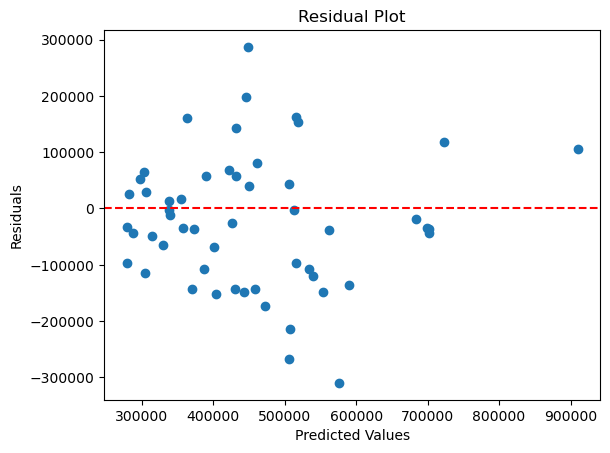

In [407]:
# Make predictions on the test set
test_predictions = best_model.predict(X_test_selected_n)


# Calculate the residuals
residuals = y_test_n.values.flatten() - test_predictions.flatten()

# Create a residual plot
plt.scatter(test_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

There is no feature importance in sklearn for huberRegressor

In [371]:
# from sklearn.inspection import permutation_importance

# # Fit your regression model
# best_model.fit(X_train_selected_n, y_train_n)

# # Compute permutation feature importance
# importance = permutation_importance(best_model, X_test_selected_n, y_test_n)

# # Get the feature importances and their indices
# feature_importances = importance.importances_mean
# feature_indices = np.argsort(feature_importances)

# # Plot the feature importances
# plt.barh(range(len(feature_importances)), feature_importances[feature_indices])
# plt.yticks(range(len(feature_importances)), X_test.columns[feature_indices])
# plt.xlabel('Importance')
# plt.title('Permutation Feature Importance')
# plt.show()

***<h1>References</h1>***

- ` Why can r2 be negative?:`      
https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative

- ` LarsCV:`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LarsCV.html

- ` Regularization:`  
https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a 

# Lasagna Recipe

## Ingredients:
- 1 pound (450g) ground beef
- 1 onion, finely chopped
- 3 cloves garlic, minced
- 1 can (14 ounces/400g) crushed tomatoes
- 1 can (6 ounces/170g) tomato paste
- 1/2 cup water
- 2 teaspoons dried basil
- 2 teaspoons dried oregano
- Salt and pepper to taste
- 9 lasagna noodles, cooked and drained
- 2 cups shredded mozzarella cheese
- 1 cup grated Parmesan cheese
- Fresh parsley, for garnish

## Instructions:
1. Preheat the oven to 375°F (190°C).

2. In a large skillet, cook the ground beef, onion, and garlic over medium heat until the beef is browned and the onion is tender. Drain any excess fat.

3. Add crushed tomatoes, tomato paste, water, dried basil, dried oregano, salt, and pepper to the skillet. Stir well to combine. Simmer the sauce for about 15 minutes to allow the flavors to develop.

4. In a greased 9x13-inch baking dish, spread a thin layer of the meat sauce. Place three lasagna noodles on top of the sauce. Spread a layer of meat sauce over the noodles, followed by a layer of mozzarella cheese and Parmesan cheese. Repeat the layers, ending with a layer of cheese on top.

5. Cover the baking dish with aluminum foil and bake in the preheated oven for 25 minutes. Then, remove the foil and bake for an additional 10 minutes or until the cheese is bubbly and golden.

6. Remove the lasagna from the oven and let it cool for a few minutes. Garnish with fresh parsley.

7. Slice and serve the lasagna while it's still hot and delicious!

Enjoy your homemade lasagna!